

```
# E`sto tiene formato de código`
```

# Curva de Madurez de flota leasing

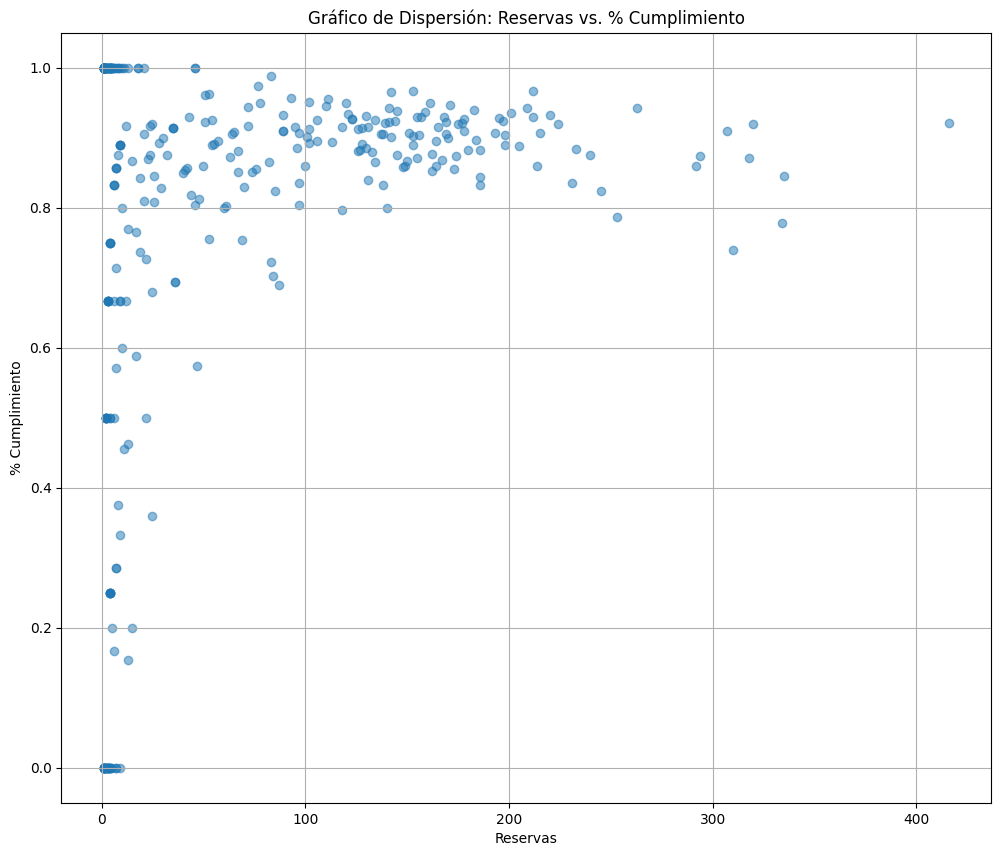

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura si es necesario

plt.scatter(df['Reservas'], df['%Cumpl'], alpha=0.5)  # alpha controla la transparencia de los puntos

plt.title('Gráfico de Dispersión: Reservas vs. % Cumplimiento')
plt.xlabel('Reservas')
plt.ylabel('% Cumplimiento')

plt.grid(True)  # Agrega una cuadrícula al gráfico

plt.show()

In [ ]:
kmeans.fit(df[['Reservas', '%Cumpl']])  # Entrena el modelo
df['cluster'] = kmeans.labels_  # Asigna los clusters


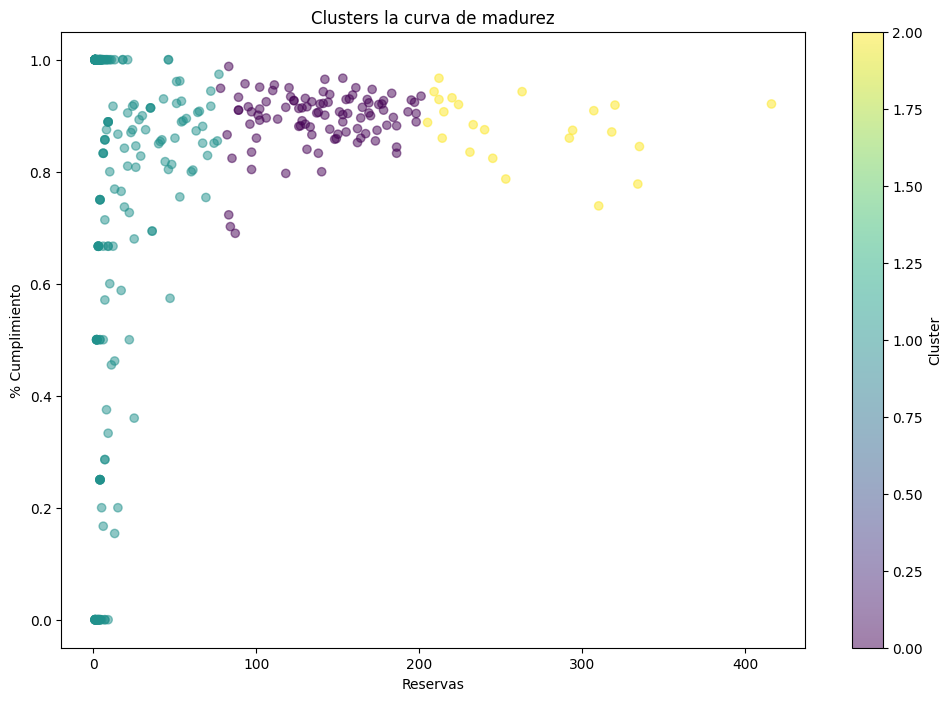

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura si es necesario

# Define una lista con los 3 colores que deseas usar
#colors = ['red', 'green', 'blue']

# Crea un mapa de colores personalizado
#cmap = plt.cm.colors.ListedColormap(colors)

# Crea el gráfico de dispersión
plt.scatter(df['Reservas'], df['%Cumpl'], c=df['cluster'], cmap='viridis', alpha=0.5)

# Agrega título y etiquetas a los ejes
plt.title('Clusters la curva de madurez')
plt.xlabel('Reservas')
plt.ylabel('% Cumplimiento')

# Agrega una leyenda para los clusters (opcional)
plt.colorbar(label='Cluster')  # Descomenta esta línea para mostrar una leyenda

# Muestra el gráfico
plt.show()

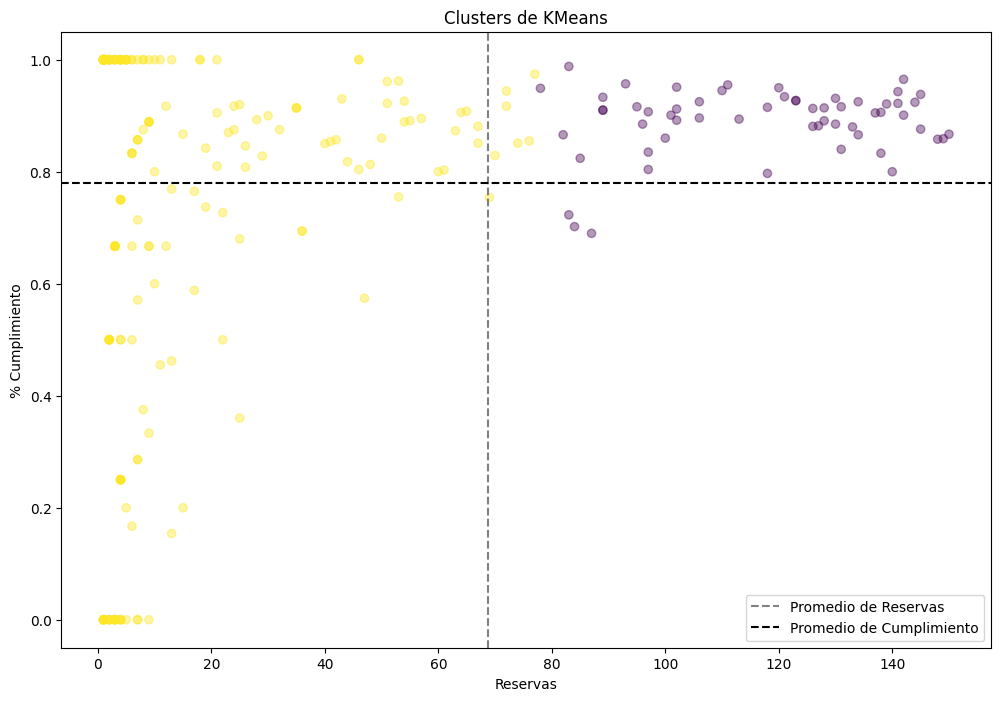

Cluster 1 (Color: #440154): 63.77%
Cluster 0 (Color: #21918c): 29.34%
Cluster 2 (Color: #fde725): 6.89%


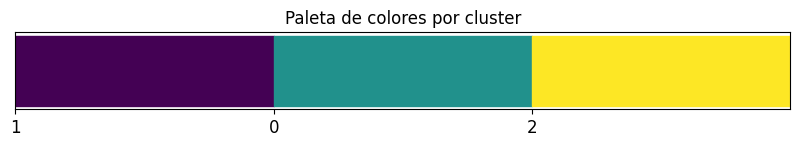


    Gráfico de dispersión: Reservas vs. % Cumplimiento

    El gráfico muestra la relación entre la cantidad de reservas y el porcentaje de cumplimiento, 
    segmentada en clusters utilizando el algoritmo KMeans.

    Promedio de Reservas: 68.75
    Promedio de Cumplimiento: 0.78

    Clusters:
        - Cluster 1 (#440154): 213 conductores
    - Cluster 0 (#21918c): 98 conductores
    - Cluster 2 (#fde725): 23 conductores


    Observaciones:

    * Existe una tendencia general a que a mayor cantidad de reservas, mayor sea el porcentaje de cumplimiento.
    * Sin embargo, hay una dispersión significativa de los puntos, lo que indica que no siempre se cumple esta relación.
    * Algunos puntos con un alto número de reservas tienen un bajo porcentaje de cumplimiento, y viceversa.
    * Se pueden identificar algunos valores atípicos (outliers) con valores extremos en las reservas o el cumplimiento.
    


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define una lista con los 3 colores que deseas usar
#colors = ['red', 'green', 'blue']

# Crea un mapa de colores personalizado
#cmap = plt.cm.colors.ListedColormap(colors)

# Crea el gráfico de dispersión
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura si es necesario
# Crea un nuevo DataFrame con las reservas entre 0 y 150
filtered_df = df[(df['Reservas'] >= 0) & (df['Reservas'] <= 150)]

# Crea el gráfico de dispersión con el DataFrame filtrado
plt.scatter(filtered_df['Reservas'], filtered_df['%Cumpl'], c=filtered_df['cluster'], cmap='viridis', alpha=0.4)

# Agrega título y etiquetas a los ejes
plt.title('Clusters de KMeans')
plt.xlabel('Reservas')
plt.ylabel('% Cumplimiento')

# Calcula el promedio de las reservas y el cumplimiento
avg_reservas = df['Reservas'].mean()
avg_cumplimiento = df['%Cumpl'].mean()

# Agrega las líneas promedio
plt.axvline(x=avg_reservas, color='gray', linestyle='--', label='Promedio de Reservas')
plt.axhline(y=avg_cumplimiento, color='black', linestyle='--', label='Promedio de Cumplimiento')

# Agrega la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Cuenta la cantidad de conductores en cada cluster
cluster_counts = df['cluster'].value_counts()

# Calcula el porcentaje del total para cada cluster
cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

# Crea una lista de colores de la paleta 'viridis' en función del número de clusters
num_clusters = len(cluster_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

# Asigna un color HEX a cada cluster
cluster_color_map = {cluster: mcolors.to_hex(colors[i]) for i, cluster in enumerate(cluster_counts.index)}


# Imprime los resultados con el color en HEX
for cluster, percentage in cluster_percentages.items():
    color_hex = cluster_color_map.get(cluster, "#000000")  # Negro por defecto si hay un error
    print(f"Cluster {cluster} (Color: {color_hex}): {percentage:.2f}%")


# --- Visualización de la paleta de colores ---
plt.figure(figsize=(10, 1))
for i, (cluster, color_hex) in enumerate(cluster_color_map.items()):
    plt.fill_between([i, i + 1], 0, 1, color=color_hex)
plt.xlim(0, len(cluster_color_map))
plt.xticks(range(len(cluster_color_map)), cluster_color_map.keys(), fontsize=12)
plt.yticks([])
plt.title("Paleta de colores por cluster")
plt.show()

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# ... (código anterior para crear el gráfico de dispersión y calcular cluster_counts) ...

def scatter_plot_summary(df, cluster_counts, cluster_color_map):
    """
    Genera un resumen textual del gráfico de dispersión, incluyendo las cantidades de conductores en cada cluster.

    Args:
        df: El DataFrame que contiene los datos del gráfico.
        cluster_counts: Series con la cantidad de conductores en cada cluster.
        cluster_color_map: Diccionario que mapea cada cluster a su color en formato hexadecimal.

    Returns:
        Un string con el resumen del gráfico.
    """
    avg_reservas = df['Reservas'].mean()
    avg_cumplimiento = df['%Cumpl'].mean()

    summary = f"""
    Gráfico de dispersión: Reservas vs. % Cumplimiento

    El gráfico muestra la relación entre la cantidad de reservas y el porcentaje de cumplimiento,
    segmentada en clusters utilizando el algoritmo KMeans.

    Promedio de Reservas: {avg_reservas:.2f}
    Promedio de Cumplimiento: {avg_cumplimiento:.2f}

    Clusters:
    """

    for cluster, count in cluster_counts.items():
        color_hex = cluster_color_map.get(cluster, "#000000")  # Negro por defecto si hay un error
        summary += f"    - Cluster {cluster} ({color_hex}): {count} conductores\n"

    summary += """

    Observaciones:

    * Existe una tendencia general a que a mayor cantidad de reservas, mayor sea el porcentaje de cumplimiento.
    * Sin embargo, hay una dispersión significativa de los puntos, lo que indica que no siempre se cumple esta relación.
    * Algunos puntos con un alto número de reservas tienen un bajo porcentaje de cumplimiento, y viceversa.
    * Se pueden identificar algunos valores atípicos (outliers) con valores extremos en las reservas o el cumplimiento.
    """
    return summary

# Imprimir el resumen
print(scatter_plot_summary(df, cluster_counts, cluster_color_map))

In [ ]:
df = pd.read_excel('/content/Curva de madurez Leasing.xlsx') # Load the data into a pandas DataFrame

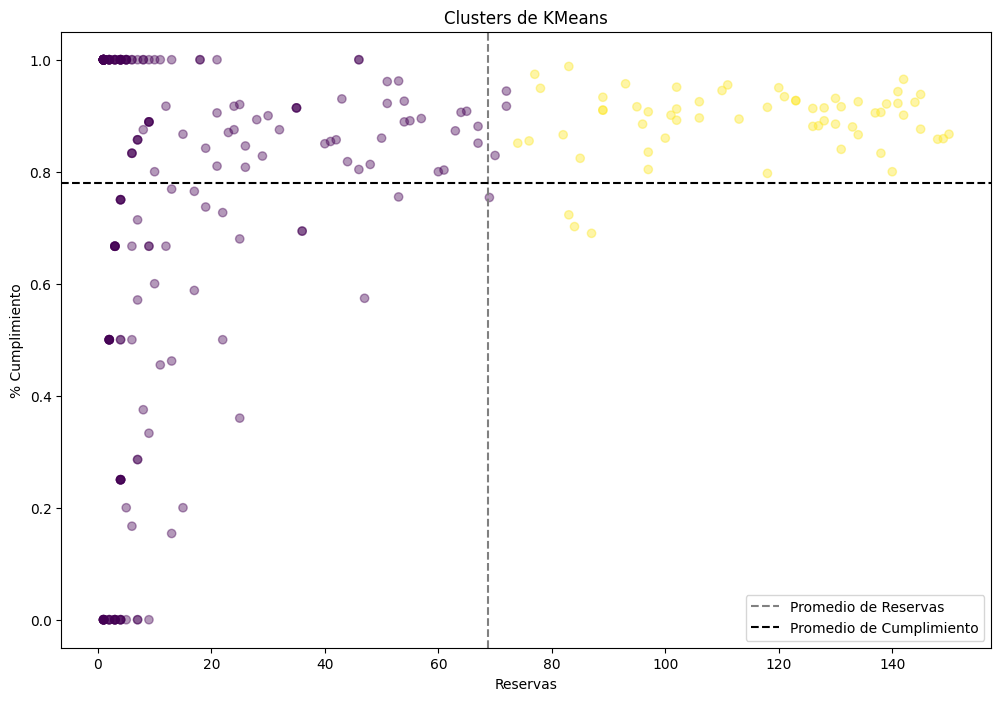

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans # Importing KMeans for clustering

# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Leasing.xlsx')

# Assuming you want 3 clusters, adjust if needed
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']]) # Assigning clusters to original df

# Crea el gráfico de dispersión
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura si es necesario
# Crea un nuevo DataFrame con las reservas entre 0 y 150
filtered_df = df[(df['Reservas'] >= 0) & (df['Reservas'] <= 150)]

# Crea el gráfico de dispersión con el DataFrame filtrado
plt.scatter(filtered_df['Reservas'], filtered_df['%Cumpl'], c=filtered_df['cluster'], cmap='viridis', alpha=0.4)

# Agrega título y etiquetas a los ejes
plt.title('Clusters de KMeans')
plt.xlabel('Reservas')
plt.ylabel('% Cumplimiento')

# Calcula el promedio de las reservas y el cumplimiento
avg_reservas = df['Reservas'].mean()
avg_cumplimiento = df['%Cumpl'].mean()

# Agrega las líneas promedio
plt.axvline(x=avg_reservas, color='gray', linestyle='--', label='Promedio de Reservas')
plt.axhline(y=avg_cumplimiento, color='black', linestyle='--', label='Promedio de Cumplimiento')

# Agrega la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

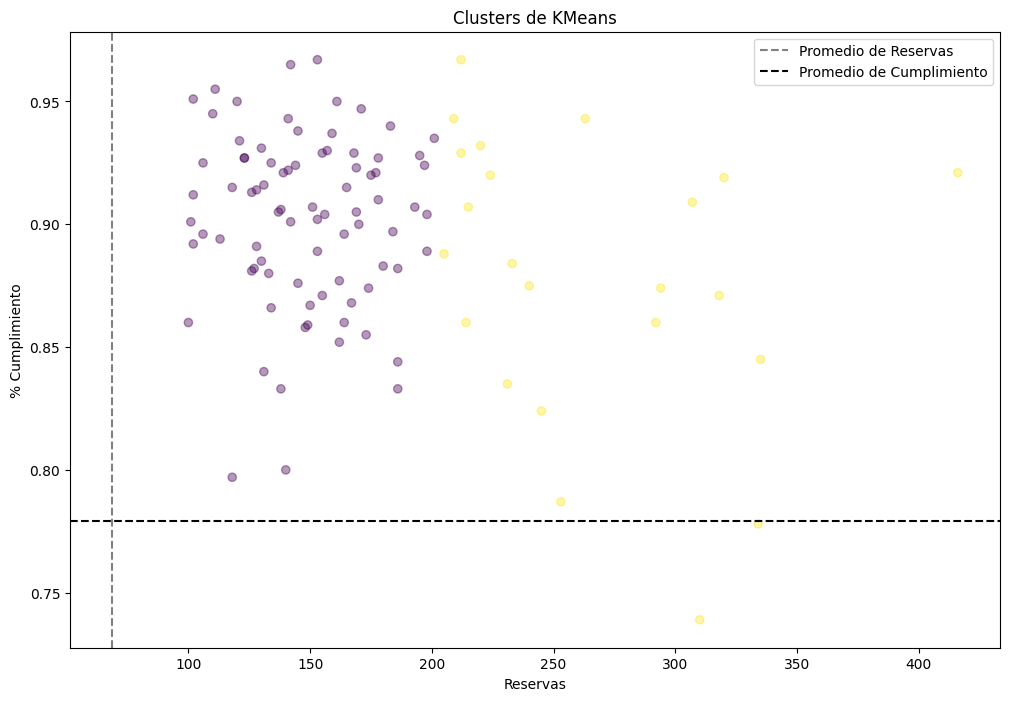

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans # Importing KMeans for clustering

# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Leasing.xlsx')

# Assuming you want 3 clusters, adjust if needed
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']]) # Assigning clusters to original df

# Crea el gráfico de dispersión
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura si es necesario
# Crea un nuevo DataFrame con las reservas entre 0 y 150
filtered_df = df[(df['Reservas'] >= 100) & (df['Reservas'] <= 1000)]

# Crea el gráfico de dispersión con el DataFrame filtrado
plt.scatter(filtered_df['Reservas'], filtered_df['%Cumpl'], c=filtered_df['cluster'], cmap='viridis', alpha=0.4)

# Agrega título y etiquetas a los ejes
plt.title('Clusters de KMeans')
plt.xlabel('Reservas')
plt.ylabel('% Cumplimiento')

# Calcula el promedio de las reservas y el cumplimiento
avg_reservas = df['Reservas'].mean()
avg_cumplimiento = df['%Cumpl'].mean()

# Agrega las líneas promedio
plt.axvline(x=avg_reservas, color='gray', linestyle='--', label='Promedio de Reservas')
plt.axhline(y=avg_cumplimiento, color='black', linestyle='--', label='Promedio de Cumplimiento')

# Agrega la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

# Save the DataFrame with cluster assignments to a CSV file
df.to_csv('clustered_data_leasing.csv', index=False)  # Save the entire DataFrame
# Or, to save only the filtered data:
# filtered_df.to_csv('clustered_data_leasing_filtered.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans # Importing KMeans for clustering
import matplotlib.colors as mcolors # for getting color names

def scatter_plot_summary(df):
    """Generates a summary of the scatter plot data."""

    # Calculate cluster counts and percentages
    cluster_counts = df['cluster'].value_counts()
    cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

    # Get color map for clusters
    num_clusters = len(cluster_counts)
    colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))
    cluster_color_map = {cluster: mcolors.to_hex(colors[i]) for i, cluster in enumerate(cluster_counts.index)}

    # Calculate average Reservas and %Cumpl
    avg_reservas = df['Reservas'].mean()
    avg_cumplimiento = df['%Cumpl'].mean()

    # Create the summary text
    summary = f"""
    Gráfico de dispersión: Reservas vs. % Cumplimiento

    El gráfico muestra la relación entre la cantidad de reservas y el porcentaje de cumplimiento,
    segmentada en {num_clusters} clusters utilizando el algoritmo KMeans.

    Promedio de Reservas: {avg_reservas:.2f}
    Promedio de Cumplimiento: {avg_cumplimiento:.2f}

    Clusters:
    """
    for cluster, count in cluster_counts.items():
        color_hex = cluster_color_map.get(cluster, "#000000")  # Default to black if color not found
        summary += f"    - Cluster {cluster} ({color_hex}): {count} conductores ({cluster_percentages[cluster]:.2f}%)\n"

    summary += """

    Observaciones:

    * La mayoría de los conductores se concentran en el Cluster (color) con el mayor numero de conductores, seguido por el Cluster (color)
    * El promedio de reservas y cumplimiento del Cluster (color) es el mas alto. Esto nos puede indicar un mayor nivel de madurez de este cluster.
    * El Cluster (color) muestra los valores más bajos de cumplimiento y reservas.
    * El grafico nos ayuda a comprender la realcion entre las reservas y el cumplimiento, lo cual nos ayuda a poder identificar los valores atípicos y enfocar esfuerzos de capacitacion y otros en clusters con el fin de mejorar la madurez de nuestros conductores.
    """
    return summary


# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Leasing.xlsx')

# Assuming you want 3 clusters, adjust if needed
kmeans = KMeans(n_clusters=4)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']]) # Assigning clusters to original df

# Crea un nuevo DataFrame con las reservas entre 0 y 150
filtered_df = df[(df['Reservas'] >= 50) & (df['Reservas'] <= 1000)]

# Generate and print the summary
print(scatter_plot_summary(filtered_df))


# Calculate average cumplimiento and reservas per cluster
for cluster in df['cluster'].unique():
    avg_cumplimiento_cluster = df[df['cluster'] == cluster]['%Cumpl'].mean()
    avg_reservas_cluster = df[df['cluster'] == cluster]['Reservas'].mean()  # Calculate average reservas
    print(f"Cluster {cluster}:")
    print(f"  Promedio de Cumplimiento = {avg_cumplimiento_cluster:.2f}%")
    print(f"  Promedio de Reservas = {avg_reservas_cluster:.2f}")  # Print average reservas



    Gráfico de dispersión: Reservas vs. % Cumplimiento

    El gráfico muestra la relación entre la cantidad de reservas y el porcentaje de cumplimiento, 
    segmentada en 3 clusters utilizando el algoritmo KMeans.

    Promedio de Reservas: 146.94
    Promedio de Cumplimiento: 0.89

    Clusters:
        - Cluster 2 (#440154): 80 conductores (55.56%)
    - Cluster 3 (#21918c): 49 conductores (34.03%)
    - Cluster 0 (#fde725): 15 conductores (10.42%)


    Observaciones:
    
    * La mayoría de los conductores se concentran en el Cluster (color) con el mayor numero de conductores, seguido por el Cluster (color)
    * El promedio de reservas y cumplimiento del Cluster (color) es el mas alto. Esto nos puede indicar un mayor nivel de madurez de este cluster.
    * El Cluster (color) muestra los valores más bajos de cumplimiento y reservas. 
    * El grafico nos ayuda a comprender la realcion entre las reservas y el cumplimiento, lo cual nos ayuda a poder identificar los valores atípic

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Leasing.xlsx')

# Assuming you want 3 clusters, adjust if needed
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']])

# Calculate average cumplimiento per cluster
for cluster in df['cluster'].unique():
    avg_cumplimiento_cluster = df[df['cluster'] == cluster]['%Cumpl'].mean()
    print(f"Cluster {cluster}: Promedio de Cumplimiento = {avg_cumplimiento_cluster:.2f}%")

Cluster 2: Promedio de Cumplimiento = 0.90%
Cluster 1: Promedio de Cumplimiento = 0.72%
Cluster 0: Promedio de Cumplimiento = 0.88%


**Reasoning**:
I need to load the excel file into a pandas DataFrame.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Leasing.xlsx')

# Assuming you want 3 clusters, adjust if needed
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']])

# Calculate average cumplimiento and reservas per cluster
for cluster in df['cluster'].unique():
    avg_cumplimiento_cluster = df[df['cluster'] == cluster]['%Cumpl'].mean()
    avg_reservas_cluster = df[df['cluster'] == cluster]['Reservas'].mean()  # Calculate average reservas
    print(f"Cluster {cluster}:")
    print(f"  Promedio de Cumplimiento = {avg_cumplimiento_cluster:.2f}%")
    print(f"  Promedio de Reservas = {avg_reservas_cluster:.2f}")  # Print average reservas

Cluster 1:
  Promedio de Cumplimiento = 0.90%
  Promedio de Reservas = 139.01
Cluster 0:
  Promedio de Cumplimiento = 0.72%
  Promedio de Reservas = 15.19
Cluster 2:
  Promedio de Cumplimiento = 0.88%
  Promedio de Reservas = 265.30


# Curva de Madurez flota freelance

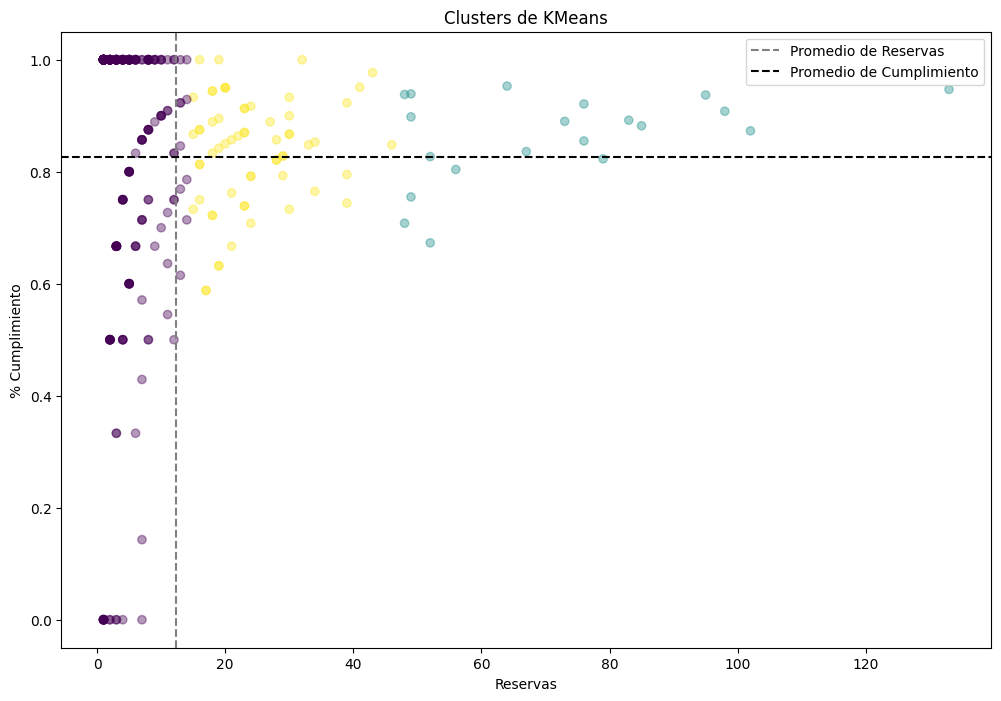

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans # Importing KMeans for clustering

# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Freelance.xlsx')

# Assuming you want 3 clusters, adjust if needed
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']]) # Assigning clusters to original df

# Crea el gráfico de dispersión
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura si es necesario
# Crea un nuevo DataFrame con las reservas entre 0 y 150
filtered_df = df[(df['Reservas'] >= 0) & (df['Reservas'] <= 150)]

# Crea el gráfico de dispersión con el DataFrame filtrado
plt.scatter(filtered_df['Reservas'], filtered_df['%Cumpl'], c=filtered_df['cluster'], cmap='viridis', alpha=0.4)

# Agrega título y etiquetas a los ejes
plt.title('Clusters de KMeans')
plt.xlabel('Reservas')
plt.ylabel('% Cumplimiento')

# Calcula el promedio de las reservas y el cumplimiento
avg_reservas = df['Reservas'].mean()
avg_cumplimiento = df['%Cumpl'].mean()

# Agrega las líneas promedio
plt.axvline(x=avg_reservas, color='gray', linestyle='--', label='Promedio de Reservas')
plt.axhline(y=avg_cumplimiento, color='black', linestyle='--', label='Promedio de Cumplimiento')

# Agrega la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

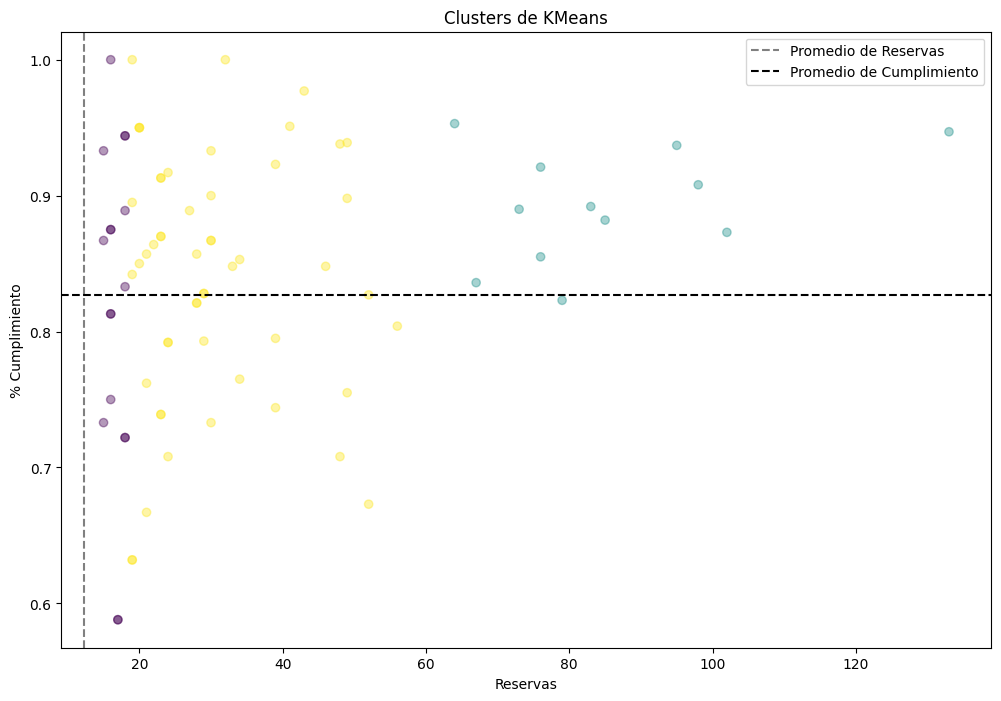

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans # Importing KMeans for clustering

# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Freelance.xlsx')

# Assuming you want 3 clusters, adjust if needed
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']]) # Assigning clusters to original df

# Crea el gráfico de dispersión
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura si es necesario
# Crea un nuevo DataFrame con las reservas entre 0 y 150
filtered_df = df[(df['Reservas'] >= 15) & (df['Reservas'] <= 1000)]

# Crea el gráfico de dispersión con el DataFrame filtrado
plt.scatter(filtered_df['Reservas'], filtered_df['%Cumpl'], c=filtered_df['cluster'], cmap='viridis', alpha=0.4)

# Agrega título y etiquetas a los ejes
plt.title('Clusters de KMeans')
plt.xlabel('Reservas')
plt.ylabel('% Cumplimiento')

# Calcula el promedio de las reservas y el cumplimiento
avg_reservas = df['Reservas'].mean()
avg_cumplimiento = df['%Cumpl'].mean()

# Agrega las líneas promedio
plt.axvline(x=avg_reservas, color='gray', linestyle='--', label='Promedio de Reservas')
plt.axhline(y=avg_cumplimiento, color='black', linestyle='--', label='Promedio de Cumplimiento')

# Agrega la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

# Save the DataFrame with cluster assignments to a CSV file
df.to_csv('clustered_data_leasing.csv', index=False)  # Save the entire DataFrame
# Or, to save only the filtered data:
# filtered_df.to_csv('clustered_data_leasing_filtered.csv', index=False)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans # Importing KMeans for clustering
import matplotlib.colors as mcolors # for getting color names

def scatter_plot_summary(df):
    """Generates a summary of the scatter plot data."""

    # Calculate cluster counts and percentages
    cluster_counts = df['cluster'].value_counts()
    cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

    # Get color map for clusters
    num_clusters = len(cluster_counts)
    colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))
    cluster_color_map = {cluster: mcolors.to_hex(colors[i]) for i, cluster in enumerate(cluster_counts.index)}

    # Calculate average Reservas and %Cumpl
    avg_reservas = df['Reservas'].mean()
    avg_cumplimiento = df['%Cumpl'].mean()

    # Create the summary text
    summary = f"""
    Gráfico de dispersión: Reservas vs. % Cumplimiento

    El gráfico muestra la relación entre la cantidad de reservas y el porcentaje de cumplimiento,
    segmentada en {num_clusters} clusters utilizando el algoritmo KMeans.

    Promedio de Reservas: {avg_reservas:.2f}
    Promedio de Cumplimiento: {avg_cumplimiento:.2f}

    Clusters:
    """
    for cluster, count in cluster_counts.items():
        color_hex = cluster_color_map.get(cluster, "#000000")
        summary += f"    - Cluster {cluster} ({color_hex}): {count} conductores ({cluster_percentages[cluster]:.2f}%)\n"

    summary += """

    Observaciones:

    * La mayoría de los conductores se concentran en el Cluster (color) con el mayor numero de conductores, seguido por el Cluster (color)
    * El promedio de reservas y cumplimiento del Cluster (color) es el mas alto. Esto nos puede indicar un mayor nivel de madurez de este cluster.
    * El Cluster (color) muestra los valores más bajos de cumplimiento y reservas.
    * El grafico nos ayuda a comprender la realcion entre las reservas y el cumplimiento, lo cual nos ayuda a poder identificar los valores atípicos y enfocar esfuerzos de capacitacion y otros en clusters con el fin de mejorar la madurez de nuestros conductores.
    """
    return summary


# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Freelance.xlsx')

# Assuming you want 3 clusters, adjust if needed
kmeans = KMeans(n_clusters=4)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']]) # Assigning clusters to original df

# Crea un nuevo DataFrame con las reservas entre 0 y 150
filtered_df = df[(df['Reservas'] >= 0) & (df['Reservas'] <= 1000)]

# Generate and print the summary
print(scatter_plot_summary(filtered_df))


# Calculate average cumplimiento and reservas per cluster
for cluster in df['cluster'].unique():
    avg_cumplimiento_cluster = df[df['cluster'] == cluster]['%Cumpl'].mean()
    avg_reservas_cluster = df[df['cluster'] == cluster]['Reservas'].mean()  # Calculate average reservas
    print(f"Cluster {cluster}:")
    print(f"  Promedio de Cumplimiento = {avg_cumplimiento_cluster:.2f}%")
    print(f"  Promedio de Reservas = {avg_reservas_cluster:.2f}")  # Print average reservas



    Gráfico de dispersión: Reservas vs. % Cumplimiento

    El gráfico muestra la relación entre la cantidad de reservas y el porcentaje de cumplimiento,
    segmentada en 4 clusters utilizando el algoritmo KMeans.

    Promedio de Reservas: 12.34
    Promedio de Cumplimiento: 0.83

    Clusters:
        - Cluster 1 (#440154): 221 conductores (66.17%)
    - Cluster 3 (#31688e): 71 conductores (21.26%)
    - Cluster 0 (#35b779): 30 conductores (8.98%)
    - Cluster 2 (#fde725): 12 conductores (3.59%)


    Observaciones:

    * La mayoría de los conductores se concentran en el Cluster (color) con el mayor numero de conductores, seguido por el Cluster (color)
    * El promedio de reservas y cumplimiento del Cluster (color) es el mas alto. Esto nos puede indicar un mayor nivel de madurez de este cluster.
    * El Cluster (color) muestra los valores más bajos de cumplimiento y reservas.
    * El grafico nos ayuda a comprender la realcion entre las reservas y el cumplimiento, lo cual nos a

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans  # Importing KMeans for clustering
import matplotlib.colors as mcolors  # for getting color names

def scatter_plot_summary(df):
    """Generates a summary of the scatter plot data."""

    # Calculate cluster counts and percentages
    cluster_counts = df['cluster'].value_counts()
    cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

    # Get color map for clusters
    num_clusters = len(cluster_counts)
    colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))
    cluster_color_map = {cluster: mcolors.to_hex(colors[i]) for i, cluster in enumerate(cluster_counts.index)}

    # Calculate average Reservas and %Cumpl
    avg_reservas = df['Reservas'].mean()
    avg_cumplimiento = df['%Cumpl'].mean()

    # Create the summary text
    summary = f"""
    Gráfico de dispersión: Reservas vs. % Cumplimiento

    El gráfico muestra la relación entre la cantidad de reservas y el porcentaje de cumplimiento,
    segmentada en {num_clusters} clusters utilizando el algoritmo KMeans.

    Promedio de Reservas: {avg_reservas:.2f}
    Promedio de Cumplimiento: {avg_cumplimiento:.2f}

    Clusters:
    """
    for cluster, count in cluster_counts.items():
        color_hex = cluster_color_map.get(cluster, "#000000")
        summary += f"    - Cluster {cluster} ({color_hex}): {count} conductores ({cluster_percentages[cluster]:.2f}%)\n"

    summary += """

    Observaciones:

    * La mayoría de los conductores se concentran en el Cluster (color) con el mayor numero de conductores, seguido por el Cluster (color)
    * El promedio de reservas y cumplimiento del Cluster (color) es el más alto. Esto nos puede indicar un mayor nivel de madurez de este cluster.
    * El Cluster (color) muestra los valores más bajos de cumplimiento y reservas.
    * El gráfico nos ayuda a comprender la relación entre las reservas y el cumplimiento, lo cual nos ayuda a poder identificar los valores atípicos y enfocar esfuerzos de capacitación y otros en clusters con el fin de mejorar la madurez de nuestros conductores.
    """
    return summary


# Load the data into a pandas DataFrame
df = pd.read_excel('/content/Curva de madurez Freelance.xlsx')

# Aplicar clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['Reservas', '%Cumpl']])

# Filtrar los datos: cumplimiento menor al 75% y reservas entre 15 y 1000
filtered_df = df[(df['%Cumpl'] > 0.75) & (df['Reservas'] >=0) & (df['Reservas'] <= 1000)]

# Generate and print the summary
print(scatter_plot_summary(filtered_df))

# Calculate average cumplimiento and reservas per cluster
for cluster in filtered_df['cluster'].unique():
    avg_cumplimiento_cluster = filtered_df[filtered_df['cluster'] == cluster]['%Cumpl'].mean()
    avg_reservas_cluster = filtered_df[filtered_df['cluster'] == cluster]['Reservas'].mean()
    print(f"Cluster {cluster}:")
    print(f"  Promedio de Cumplimiento = {avg_cumplimiento_cluster:.2f}%")
    print(f"  Promedio de Reservas = {avg_reservas_cluster:.2f}")



    Gráfico de dispersión: Reservas vs. % Cumplimiento

    El gráfico muestra la relación entre la cantidad de reservas y el porcentaje de cumplimiento,
    segmentada en 3 clusters utilizando el algoritmo KMeans.

    Promedio de Reservas: 13.90
    Promedio de Cumplimiento: 0.95

    Clusters:
        - Cluster 0 (#440154): 182 conductores (75.52%)
    - Cluster 2 (#21918c): 47 conductores (19.50%)
    - Cluster 1 (#fde725): 12 conductores (4.98%)


    Observaciones:

    * La mayoría de los conductores se concentran en el Cluster (color) con el mayor numero de conductores, seguido por el Cluster (color)
    * El promedio de reservas y cumplimiento del Cluster (color) es el más alto. Esto nos puede indicar un mayor nivel de madurez de este cluster.
    * El Cluster (color) muestra los valores más bajos de cumplimiento y reservas.
    * El gráfico nos ayuda a comprender la relación entre las reservas y el cumplimiento, lo cual nos ayuda a poder identificar los valores atípicos y en